# Regresión logística

## Estándares/Objetivos

  * Coloque la regresión logística en la taxonomía de los algoritmos de ML
  * Explicar las diferencias y similitudes clave entre la regresión logística y lineal.
  * Ajustar e interpretar un modelo de regresión logística en scikit-learn
  * Interpretar los coeficientes de regresión logística, usando razón de probabilidades

## Regresión logística como modelo

La regresión logística es un modelo de **aprendizaje supervisado** **paramétrico** **clasificación**.

Un modelo de aprendizaje supervisado es aquel en el que predecimos un objetivo (o etiqueta o $y$) en función de los valores de las características (o $x$s). La alternativa (un modelo no supervisado) intenta descubrir algo sobre los datos sin predecir un valor específico.

Un modelo paramétrico se ajusta con un número fijo de parámetros. Los modelos no paramétricos pueden ser arbitrariamente complejos en función de los datos.

Los modelos de aprendizaje supervisado son (normalmente) **regresores** o clasificadores. Con regresores el objetivo es un número; dados los valores de las características, predecirá un valor numérico.

Para un clasificador (como la regresión logística), el objetivo es categórico. Principalmente discutiremos los clasificadores binarios, pero también consideraremos la clasificación multinomial. Nuestro modelo predecirá (o al menos debería) predecir la probabilidad de que el objetivo esté en cada clase posible, en lugar de simplemente en la "mejor" clase. Algunos clasificadores solo predicen una clase en lugar de probabilidades; estos se llaman **clasificadores duros**. **Los clasificadores suaves** son más útiles; Hablaremos más sobre esto en los próximos días.

La regresión logística es generalmente lo primero que intenta al crear un clasificador y, de hecho, se usa en algunos entornos de producción.

ventajas:

 * Rápido (para entrenamiento y predicción)
 * Simple (pocos hiperparámetros)
 * Interpretable
 * Proporciona buenas probabilidades
 
Desventajas

 * Requiere ingeniería de características para capturar relaciones no lineales
 * No funciona para p > n

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
import itertools

## ¿Por qué no regresión lineal?

Supongamos que tenemos algunos datos (falsos), pero $y$ (el objetivo) siempre es 0 o 1.

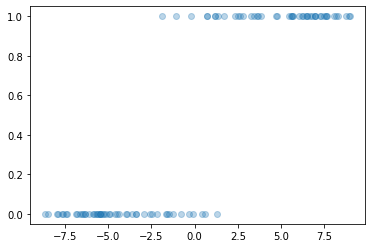

In [ ]:
npts = 100

X = stats.uniform(-9, 18).rvs(npts).reshape(npts,1)
y = stats.bernoulli(scipy.special.expit(X[:,0])).rvs(npts)

fig, ax = plt.subplots()
ax.plot(X, y, 'o', alpha=0.3)

Acabamos de aprender la regresión lineal. ¡Usemos eso para predecir $y$!

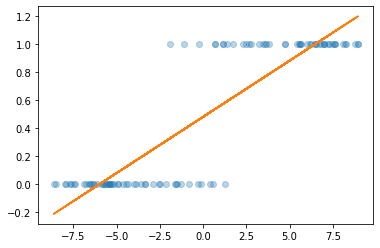

In [ ]:
model = LinearRegression()
model.fit(X, y)
ax.plot(X, model.predict(X))
fig

Discusión: ¿Qué hay de malo en esto?

## Comparación con la regresión lineal

Recuerde que con la regresión lineal creó un modelo como

$$\begin{alinear}
\hat{y} & = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... \beta_p X_p \\
   & = \mathbf{X} \beta
\end{alinear}$$

Tratamos de encontrar la "mejor" línea tal que todos los valores de $\hat{y}$ estuvieran lo más cerca posible de los valores correspondientes de $y$. Definimos esto usando una **función de pérdida** que midió qué tan mal hicimos un trabajo y encontramos los parámetros para la línea que minimizaría eso.

Para una función de pérdida elegimos la suma de cuadrados de los residuos:

$$\text{Función de pérdida} = \sum_i{(\hat{y}_i - y_i) ^ 2}$$

Discusión: ¿qué función de pérdida deberíamos usar para un clasificador?

## Funciones de pérdida

Hay un par de opciones diferentes para las funciones de pérdida. A veces hablaremos de una **puntuación** en lugar de una pérdida; estos sólo difieren en el signo. Para una función de pérdida, un valor más pequeño es un mejor ajuste; para una puntuación, un valor mayor es un mejor ajuste.

Para los clasificadores, casi siempre hablamos de la pérdida de registros, pero mencionaré la puntuación de Brier para comparar.

Supongamos que solo tenemos dos clases, entonces $y_i \in \{0, 1\}$. Sea $p_i$ la probabilidad de que el modelo prediga que $y_i$ sea 1.


La **pérdida de registro** se define entonces como

$$- \sum_i y_i \ln{p_i} + (1-y_i) \ln{(1-p_i)}$$

## Ejemplo (con datos falsos)

Generaremos datos falsos que coincidan exactamente con la distribución e intentaremos recuperar los parámetros.

In [ ]:
def logistic(x):
    return 1/(1 + np.exp(-x))

In [ ]:
npts = 100
beta0 = 0.0
beta1 = 0.5

X = stats.uniform(-9, 18).rvs(npts).reshape(npts,1)
# la función expit es la misma que la función logística
y = stats.bernoulli(logistic(beta0 + beta1*X[:,0])).rvs(npts)

Graficamos los datos; la línea vertical muestra el límite de decisión real donde la probabilidad es 0,5.

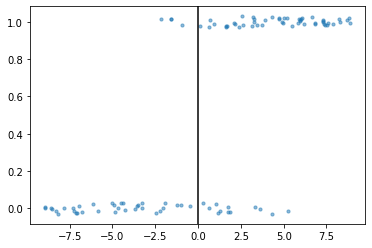

In [ ]:
jitter = stats.uniform(-0.03,0.06).rvs(npts)
fig, ax = plt.subplots()
ax.scatter(X[:,0], y + jitter, s=10, alpha=0.5)
ax.axvline(-beta0/beta1, color='black')

In [ ]:
# establecer C grande para suprimir la regularización
model = LogisticRegression(C=1000)
model.fit(X, y)
beta0hat = model.intercept_[0]
beta1hat = model.coef_[0][0]
print("beta0 =    {0:8.3f} beta1 =    {1:8.3f}".format(beta0, beta1))
print("beta0hat = {0:8.3f} beta1hat = {1:8.3f}".format(beta0hat, beta1hat))

beta0 =       0.000 beta1 =       0.500
beta0hat =   -0.412 beta1hat =    0.561


Dibujemos la curva que ajustamos en los datos, junto con la curva real utilizada para crear los datos.


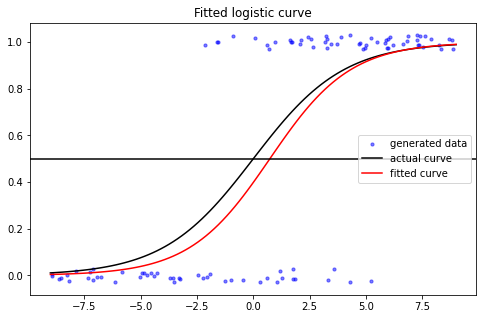

In [ ]:
xpts = np.linspace(-9, 9, 100)
yhatpts = logistic(beta0hat + beta1hat * xpts)
ypts = logistic(beta0 + beta1 * xpts)

jitter = stats.uniform(-0.03,0.06).rvs(npts)

fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(X[:,0], y + jitter, s=10, alpha=0.5, color='blue', label="generated data")
ax.plot(xpts, ypts, 'k', label='curva actual')
ax.plot(xpts, yhatpts, 'r', label='curva entrenada')
ax.axhline(0.5, color='black')
#ax.axvline(-beta0/beta1, color='black', label='actual boundary')
ax.set_title("Curva logística ajustada")
ax.legend(loc='centro derecha')

## Límite de decisión

Durante las próximas dos semanas hablaremos sobre varios modelos de clasificación diferentes. Un buen modelo hará más que solo predecir a qué clase pertenece algo; predecirá la probabilidad de que esté en esa clase.

En algún momento, sin embargo, tenemos que tomar una decisión. Para hacer eso, elegimos un **umbral** en el que colocaremos algo en una clase u otra. El **límite de decisión** es la superficie en el espacio de características en el que la probabilidad es igual al umbral.

In [ ]:
def generate_classes(nptses, mus, sds):
"""
     Genere puntos normalmente distribuidos en múltiples clases
     Parámetros
     ----------
     nptses: array_like (1-d)
         secuencia de números, el conteo de puntos en cada clase
     mus: array_like (2-d)
         secuencia de vectores, las medias de las distribuciones multivariadas para cada clase
     mus: array_like (3-d)
         secuencia de tensores simétricos 2-d, la desviación estándar de la multivariante
         distribuciones para cada clase
        
     Devoluciones
     -------
     X : matriz (2-d)
         características de los puntos generados
     y : matriz (2-d)
         etiquetas enteras de puntos, comenzando en 0
     """
    X = np.zeros((0,2))
    y = np.zeros((0,))
    
    for i, npts, mu, sd in zip(itertools.count(), nptses, mus, sds):
        X = np.concatenate([X, stats.multivariate_normal(mu, sd).rvs(npts)])
        y = np.concatenate([y, np.ones(npts)*i])
    return X, y
        

In [ ]:
X, y = generate_classes((1000,1000),
                       ((2.0, 2.5),
                        (6.0, 0.0)),
                       (((2.0, 0),
                         (0, 3.0)),
                        ((2.5, 0),
                         (0, 3.0)))
                       )

In [ ]:
def decision_boundary_x2(x, b0, b1, b2, threshold):
    return (np.log((1 - threshold)/threshold) - b0 - x*b1 )/b2

def plot_decision_boundary(X, y, model, ax=None):
    '''grafica una matriz de puntos en 2 dimensiones, con límites de decisión'''
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(X[:,0], X[:,1], color=np.where(y, 'g', 'b'), alpha=0.5, s=3)
    ax.plot(*X[y==0].mean(axis=0).reshape(-1,1), color='b', marker='+', mew=4, ms=20)
    ax.plot(*X[y==1].mean(axis=0).reshape(-1,1), color='g', marker='+', mew=4, ms=20)
    ax.axis('equal')

    xmin, xmax = X[:,0].min(), X[:,0].max()
    xrng = np.array([2*xmin-xmax, 2*xmax-xmin])

    ylim = ax.get_ylim()
    xlim = ax.get_xlim()

    beta0 = model.intercept_
    beta1, beta2 = model.coef_[0]
    print (beta0, beta1, beta2)
    
    for threshold, ls in zip(1/(1+np.exp(-np.arange(-3,4))), [':', '-.', '--', '-', '--', '-.', ':']):
        ax.plot(xrng,
                decision_boundary_x2(xrng, beta0, beta1, beta2, threshold),
                color='r',
                ls=ls,
                label="{:.2f}%".format(threshold*100))
    ax.legend(title='threshold')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[-5.09960701] 1.5750770812627937 -0.7865090429402696


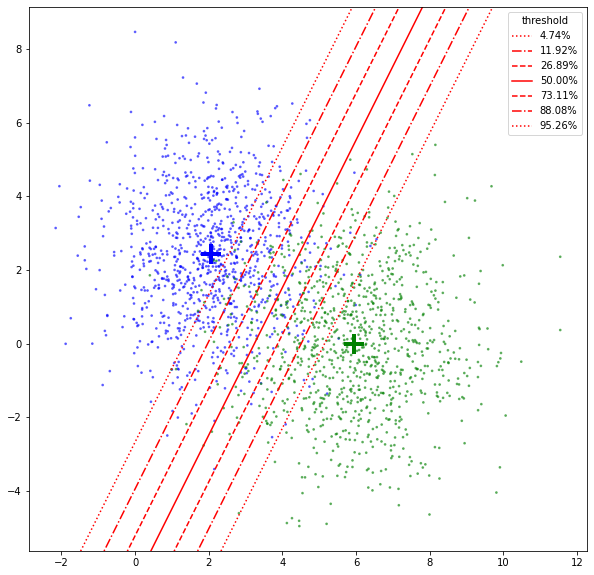

In [ ]:
X, y = generate_classes((1000,1000),
                       ((2.0, 2.5),
                        (6.0, 0.0)),
                       (((2.0, 0),
                         (0, 3.0)),
                        ((2.5, 0),
                         (0, 3.0)))
                       )
model = LogisticRegression(C=1000, intercept_scaling=100)
model.fit(X, y)

plot_decision_boundary(X, y, model)

## Matriz de confusión

Una [Matriz de confusión](https://en.wikipedia.org/wiki/Confusion_matrix) proporciona el recuento de instancias en función de los valores reales y previstos del objetivo. Para un clasificador binario parece

| &nbsp; |Previsto positivo|Previsto negativo |
|-----------------------------------|------------------|--------- ------|
| **Positivo real**| verdadero positivo | falso negativo|
| **Negativo real**| falso positivo | verdadero negativo |


*Verdadero* y *falso* se refieren a si estás en lo correcto.

*Positivo* y *negativo* se refieren al resultado **previsto**.

Un *error tipo I* es un falso positivo (que recuerdo porque esa frase es más común que un falso negativo).

Precisión $= \frac{TP+TN}{TP+TN+FP+FN}$

Sensibilidad = Recuperación = TPR $= \frac{TP}{TP+FN}$

FPR $= \frac{FP}{TN+FP}$

Especificidad $= \frac{TN}{TN+FP}$

Precisión = PPV $= \frac{TP}{TP+FP}$

VAN $= \frac{TN}{TN+FN}$

#### Puntuación F

$F_\beta$ evalúa una prueba suponiendo que la recuperación es $\beta$ veces más importante que la precisión; es una media armónica ponderada de los dos.

$$F_\beta = (1+\beta^2) \frac{\text{precisión} \cdot \text{recordar}}{\beta^2\text{precisión} + \text{recordar} } $$

$$F_1 = 2 \frac{\text{precisión} \cdot \text{recordar}}{\text{precisión} + \text{recordar} } = \frac{1}{\frac{\frac{1}{ \text{precisión}} + \frac{1}{\text{recordar}}}{2}}$$

## Curvas ROC

Cualquier modelo de clasificación decente proporcionará las probabilidades de que un punto de datos esté en una clase u otra. Para visualizar la bondad general de un modelo, utilizamos una curva característica del operador del receptor, que muestra el TPR (también conocido como sensibilidad) y el FPR (también conocido como 1-especificidad) para varios umbrales.

Cualquier alternativa es la curva de recuperación de precisión, que es más apropiada cuando está más interesado en la clase positiva.

Los modelos se pueden comparar por el área bajo la curva (AUC) de cualquiera de los gráficos.

Nota: Estamos usando el método `predict_proba` a continuación en `sklearn`.

In [ ]:
def calculate_threshold_values(prob, y):
    '''
     Cree un marco de datos de las diversas proporciones de matriz de confusión por umbral
     de una lista de probabilidades pronosticadas y valores reales de y
     '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('Curva ROC')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Curva Recall')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(left=0,right=1)
    ax.set_ylim(bottom=0,top=1)

In [ ]:
X, y = generate_classes((1000,1000),
                       ((2.0, 2.5),
                        (6.0, 0.0)),
                       (((2.0, 0),
                         (0, 3.0)),
                        ((2.5, 0),
                         (0, 3.0)))
                       )
model = LogisticRegression(C=1000)
model.fit(X, y)

LogisticRegression(C=1000)

[-6.35577657] 1.8883252779261344 -0.8584647847147817


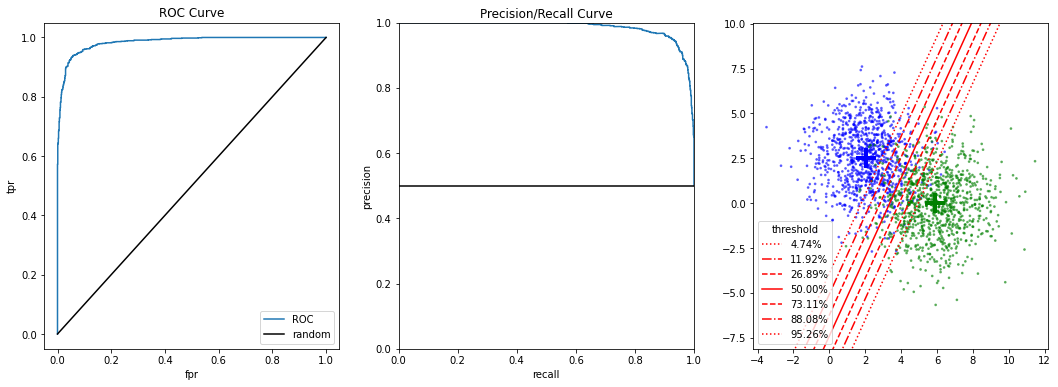

In [ ]:
fig, (ax0, ax1, ax3) = plt.subplots(1,3, figsize=(18,6))
df = calculate_threshold_values(model.predict_proba(X)[:,1], y)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)
plot_decision_boundary(X, y, model, ax3)

La línea negra "aleatoria" es un modelo que adivina la clase aleatoriamente, parametrizado por la probabilidad de adivinar una clase u otra.